In [5]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

In [6]:
N = 100
T = 10
t = np.linspace(0, T, N + 1)
Delta = np.sqrt(T / N)
x0 = 10


In [7]:
def Black_Scholes_Merton(T, N, t, Delta, x0, W):
    theta1 = 1
    theta2 = 0.2
    xt = []
#     W = BM(T, N, t, Delta)
    for it, i in enumerate(t):
        xt1 = x[] * np.exp((theta1 - theta2 ** 2 / 2) * t[it]  + theta2 * W[it])
        xt.append(xt1)
    return xt

In [8]:
def BM(T, N, t, Delta):
    W = [0]
    X = np.linspace(0, T, N + 1)
    for i in range (1, len(X)):
        W1 = W[i - 1] + np.random.normal(0, 1) * Delta
        W.append(W1)
    return W

def Ornstein_Uhlenbeck(T, N, t, Delta, x0, W):
    theta = 5
    sigma = 3.5
#     W = BM(T, N, t, Delta)
    integr = []
    xt = []
    for i in range(1, N):
        integr1 = np.exp(theta * t[i-1]) * (W[i] - W[i - 1])
        integr.append(integr1)
    for it, i in enumerate(t):
        xt1 = np.exp(- theta * t[it]) * (xt[it-1] + sigma * np.sum(integr[0:it]))
        xt.append(xt1)
    return xt

In [9]:
def Cox_Ingersoll_Ross(T, N, t, Delta, x0):
    theta1 = 2
    theta2 = 0.2
    theta3 = 0.15
    W = BM(T, N, t, Delta)
    x = np.zeros(N+1)
    x[0] = x0
    integr = 0
    for it in range(1, N+1):
        integr += np.exp(t[it-1]) * (W[it] - W[it - 1]) * np.sqrt(x[it-1])
        x[it] = ((x[it-1] - theta1 / theta2) + theta3 * integr)  * np.exp((- theta2 * t[it]))
    return x

In [10]:
W = BM(T, N, t, Delta)
plt.plot(t, Ornstein_Uhlenbeck(T, N, t, Delta, x0, W), label='Ornstein Uhlenbeck')
plt.plot(t, Black_Scholes_Merton(T, N, t, Delta, x0, W), label='Black_Scholes_Merton')
plt.plot(t, Cox_Ingersoll_Ross(T, N, t, Delta, x0), label=' Cox_Ingersoll_Ross')
plt.grid()
plt.legend()

NameError: name 'x' is not defined

In [7]:
def Ornstein_Uhlenbeck_new(T, N, t, Delta, x0, W):
    theta = 1
    sigma = 0.3
    mu = 1.2
#     W = BM(T, N, t, Delta)
    integr = []
    xt = []
    for i in range(1, N):
        integr1 = np.exp( - theta * (t[i-1] - t[i])) * (W[i] - W[i - 1])
        integr.append(integr1)
    for it, i in enumerate(t):
        xt1 = mu + (x0 - mu) * np.exp(- theta * t[it]) + sigma * np.sum(integr[0:it])
        xt.append(xt1)
    return xt

Text(0, 0.5, 'X')

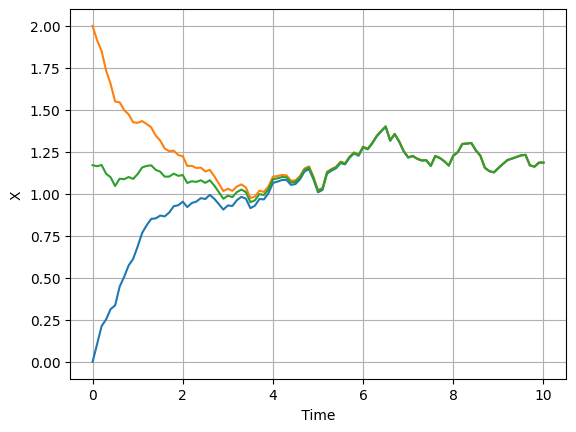

In [73]:
Number = np.random.normal(1.2, 0.3 * 0.3 / 2)
plt.plot(t, Ornstein_Uhlenbeck_new(1, N, t, Delta, 0, W))
plt.plot(t, Ornstein_Uhlenbeck_new(1, N, t, Delta, 2, W))
plt.plot(t, Ornstein_Uhlenbeck_new(1, N, t, Delta, Number, W))
plt.grid()
plt . xlabel (" Time ")
plt . ylabel ("X")

In [45]:
def CKLS_model(T, N, t, Delta, x0):
    sigma = 0.5
    a = 0.1
    b = 0.1
    for m in range(0, 100):
        W = BM(T, N, t, Delta)
        x = np.zeros(N+1)
        x[0] = x0
        integr = 0
        for it in range(1, N+1):
            integr += np.exp(b * t[it] - t[it - 1]) * (W[it] - W[it - 1]) * np.sqrt(x[it-1])
            x[it] = x0 * np.exp(-b * t[it]) + a / b * (1 - np.exp(-b * t[it])) + sigma * integr
        plt.plot(t, x)
    
    upper = [x0]
    lower = [x0]
    for it, i in enumerate(t):
        if it > 0:
            alpha = 0.1
            k = 4 * alpha / sigma ** 2
            zeta = sigma ** 2 * (1 - np.exp(-b * t[it])) / 4 / b
            gamma = 4 * b * np.exp(-b * t[it]) * x0  / (sigma ** 2 *(1 - np.exp(-b * t[it])))
            khi = stats.norm.ppf((1 - alpha / 2))
            # print(k, zeta, gamma, khi)
            lower1 = zeta * (k + gamma - khi * np.sqrt(2 * (k + 2 * gamma)))
            upper1 = zeta * (k + gamma + khi * np.sqrt(2 * (k + 2 * gamma)))
            # print(lower1 - upper1)
            upper.append(upper1)
            lower.append(lower1)
    plt.plot(t, upper,'o-r', ms = 1, label='upper')
    plt.plot(t, lower, 'o-r', ms = 1, label='lower')
    


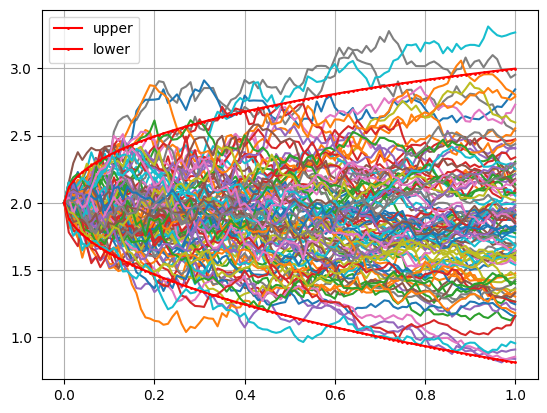

In [46]:
CKLS_model(T, N, t, Delta, 2)
plt.grid()
plt.legend()

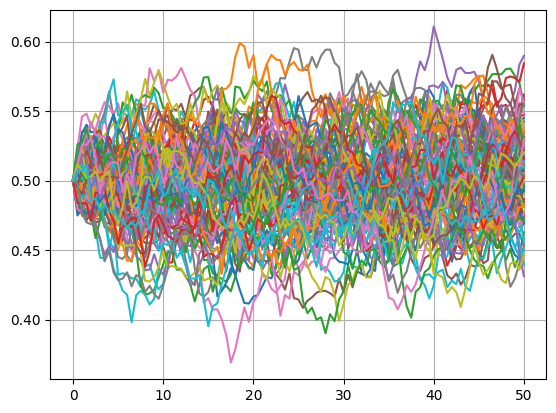

In [47]:
N = 100
T = 50
t = np.linspace(0, T, N + 1)
theta = 5
mu = 1 / 2
sigma = 0.1
for m in range(0, 100):
    x = np.zeros(N + 1)
    dt = 1 / N
    x[0] = 0.5
    for it in range(1, N + 1):
        dxt = theta * (mu - x[it-1]) * dt + sigma * np.random.normal(0, np.sqrt(dt))
        x[it] = x[it - 1] + dxt
    plt.plot(t, x)
plt.grid()

In [65]:
def half_mean_reversed(alpha, mu, N, x0):
    t = np.linspace(0, T, N + 1)
    x = np.zeros(N + 1)
    x[0] = mu
    x_half = np.zeros(N + 1)
    for it in range(1, N + 1): 
        dxt = alpha * (mu - x[it-1]) * dt + sigma * np.random.normal(0, np.sqrt(dt))
        x[it] = x[it - 1] + dxt
    
    z_lag = np.roll(x, 1)
    z_lag[0] = 0
    z_ret = x - z_lag
    z_ret[0] = 0
    print(z_ret)
    #adds intercept terms to X variable for regression
    z_lag2 = sm.add_constant(z_lag)
    model = sm.OLS(z_ret,z_lag2)
    res = model.fit()
    halflife = (- np.log(2) / res.params[1] ) / 365 * T
    return x, np.floor(halflife), halflife

[ 0.          0.00832725 -0.01307625 ... -0.00718559 -0.0281517
  0.00841745]
42.0 42.70597492447949


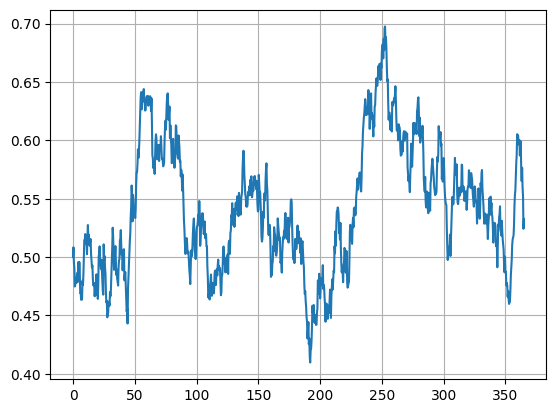

In [68]:
N = 1000
t = np.linspace(0, T, N + 1)
T = 365
x, half_time, d = half_mean_reversed(1, 1/2, N, x0)

plt.plot(t, x)
print(half_time, d)
plt.grid()